In [1]:
!pip install tensorflow
!pip install opencv-python
!pip install matplotlib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install --upgrade tensorflow

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import DepthwiseConv2D


class CustomDepthwiseConv2D(DepthwiseConv2D):
    def __init__(self, *args, **kwargs):

        kwargs.pop('groups', None)
        super().__init__(*args, **kwargs)


model = tf.keras.models.load_model(
    '/content/drive/MyDrive/my_model_eff2.h5',
    custom_objects={'DepthwiseConv2D': CustomDepthwiseConv2D}
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


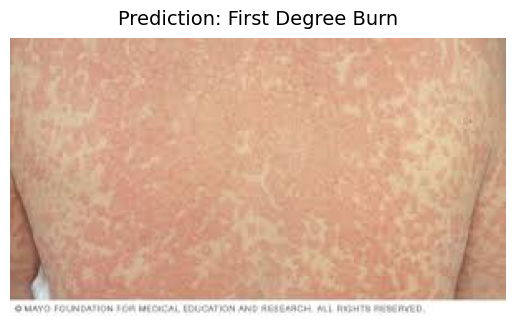

Image: img100.jpg
Prediction: First Degree Burn
----------------------------------------


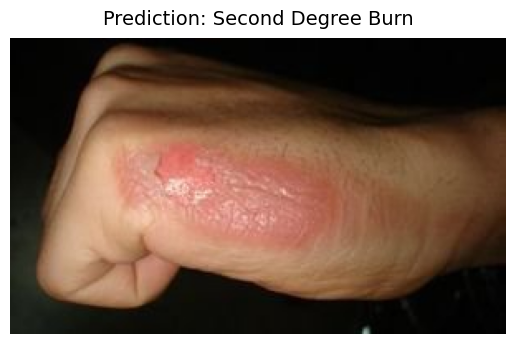

Image: img1031.jpg
Prediction: Second Degree Burn
----------------------------------------


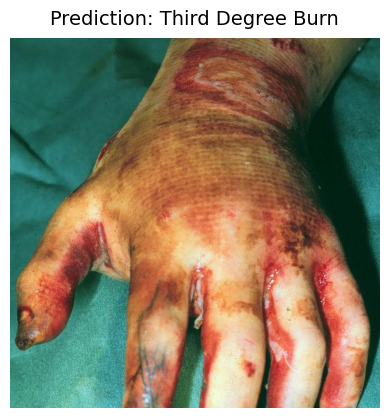

Image: 0372.jpg
Prediction: Third Degree Burn
----------------------------------------


In [11]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.efficientnet import preprocess_input
import matplotlib.pyplot as plt

# List of image paths
img_paths = [
    '/content/drive/MyDrive/1st degree burn/img100.jpg',
    '/content/drive/MyDrive/2nd degree burn/img1031.jpg',
    '/content/0372.jpg'
]

# Class names
class_names = ['First Degree Burn', 'Second Degree Burn', 'Third Degree Burn']

# Load and preprocess all images
images = []
for img_path in img_paths:
    img = image.load_img(img_path, target_size=(224, 224))  # Resize the image
    img_array = image.img_to_array(img)  # Convert to numpy array
    images.append(img_array)

# Convert the list of images to a batch (4D numpy array)
images_batch = np.array(images)
images_batch = preprocess_input(images_batch)  # Preprocess the batch

# Make predictions using the model
predictions = model.predict(images_batch)

# Display results for each image
for i, img_path in enumerate(img_paths):
    # Get the predicted class
    predicted_class = np.argmax(predictions[i])  # Find the index of the highest confidence score

    # Display the image with the prediction
    plt.imshow(image.load_img(img_path))  # Load the original image for display
    plt.axis('off')  # Hide the axes
    plt.title(f"Prediction: {class_names[predicted_class]}", fontsize=14, pad=10)  # Add a title with the prediction
    plt.show()

    # Print the result
    print(f"Image: {img_path.split('/')[-1]}")  # Print the image file name
    print(f"Prediction: {class_names[predicted_class]}")  # Print the predicted class
    print("-" * 40)  # Separator for clarity